In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


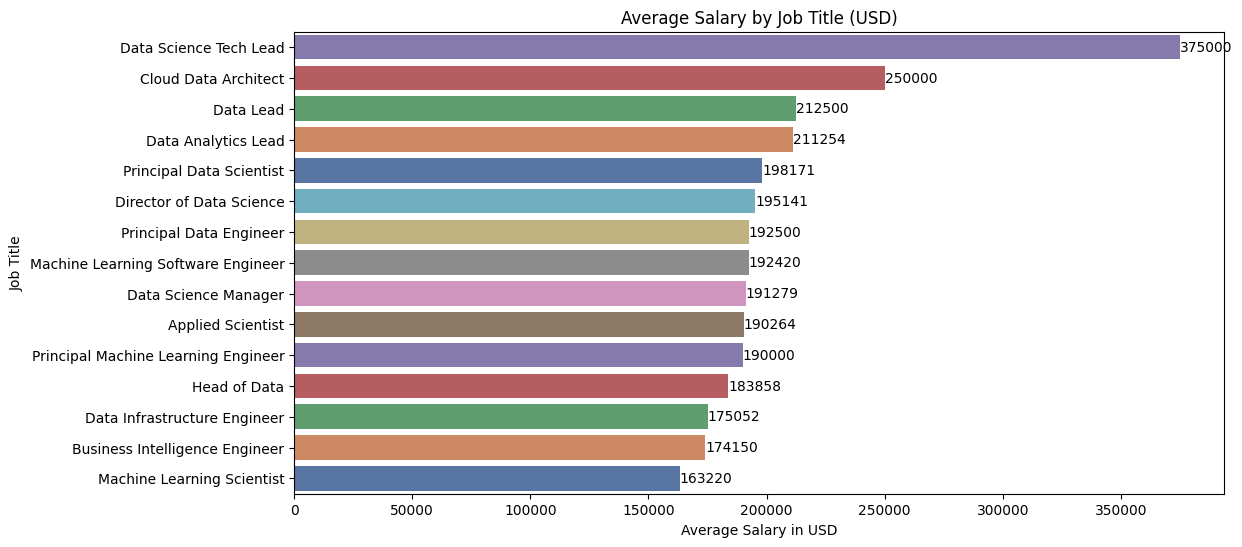

In [21]:



average_salary_by_job = df.groupby('job_title')['salary_in_usd'].mean().reset_index()

# Sort values for better visualization
average_salary_by_job = average_salary_by_job.sort_values(by='salary_in_usd', ascending=False).head(15)

# Visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=average_salary_by_job, x='salary_in_usd', y='job_title',hue='salary_in_usd', palette='deep',legend=False)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Average Salary by Job Title (USD)')
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')
plt.show()


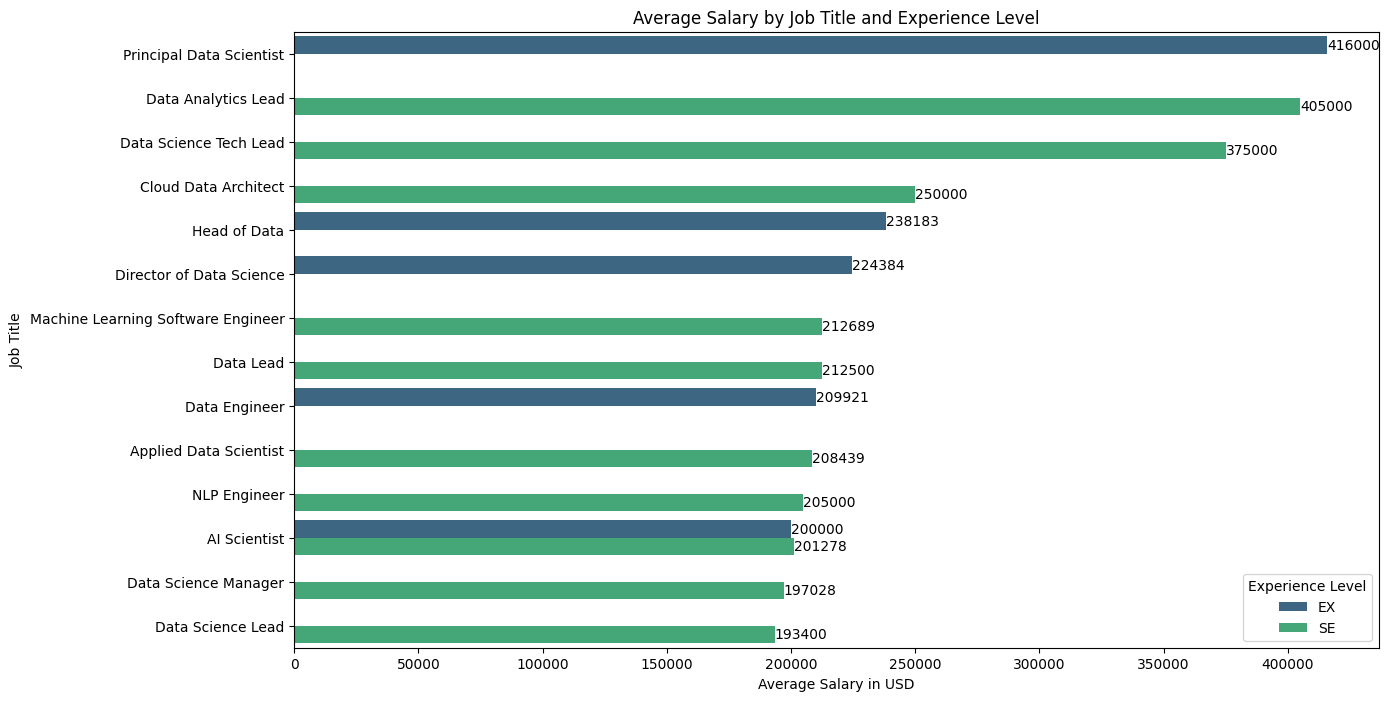

In [25]:

average_salary_by_job_exp = df.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean().reset_index()

# Sort values for better visualization
average_salary_by_job_exp = average_salary_by_job_exp.sort_values(by='salary_in_usd', ascending=False).head(15)

# Visualization using a bar plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=average_salary_by_job_exp, x='salary_in_usd', y='job_title', hue='experience_level', palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Average Salary by Job Title and Experience Level')
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')
plt.legend(title='Experience Level')
plt.show()


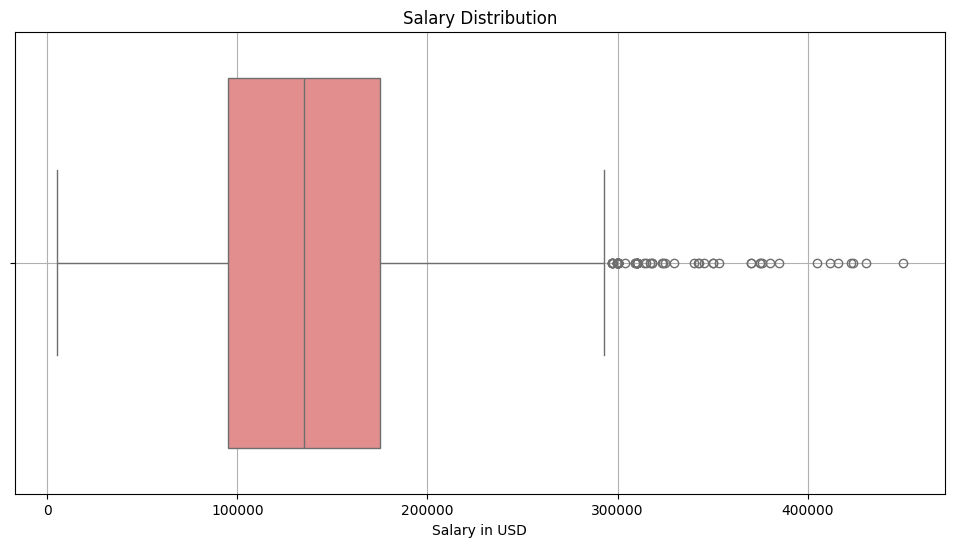

In [28]:

# Visualization using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['salary_in_usd'], color='lightcoral')
plt.title('Salary Distribution')
plt.xlabel('Salary in USD')
plt.grid()
plt.show()



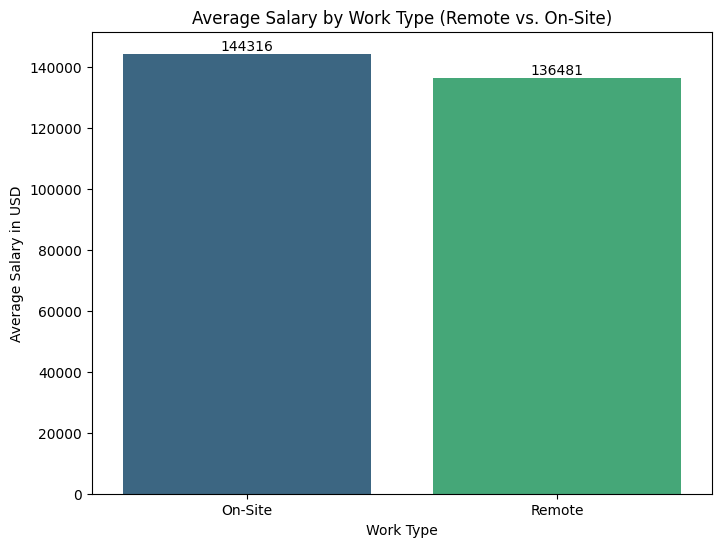

In [30]:


# Map remote_ratio to readable categories
df['work_type'] = df['remote_ratio'].map({100: 'Remote', 0: 'On-Site'})

# Step 1: Calculate average salary by work type
average_salary_by_work_type = df.groupby('work_type')['salary_in_usd'].mean().reset_index()

# Step 2: Visualization using a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=average_salary_by_work_type, x='work_type', y='salary_in_usd',hue='work_type', palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Average Salary by Work Type (Remote vs. On-Site)')
plt.xlabel('Work Type')
plt.ylabel('Average Salary in USD')
plt.show()



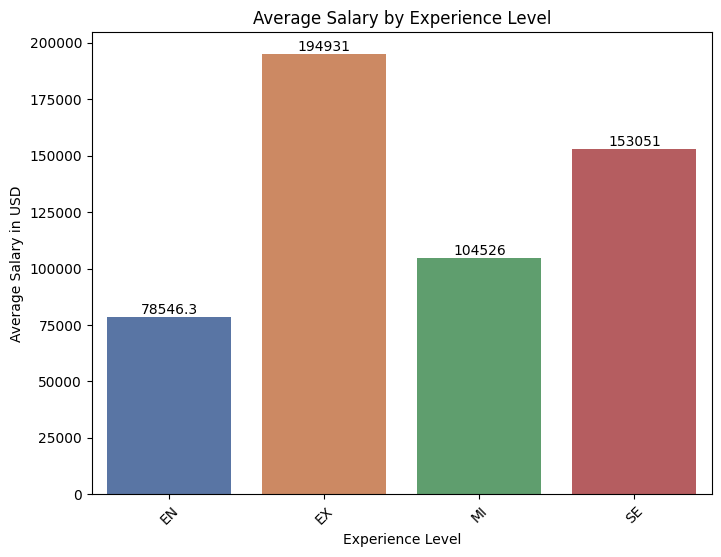

In [35]:

average_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=average_salary_by_experience, x='experience_level', y='salary_in_usd',hue='experience_level', palette='deep')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45)  
plt.show()




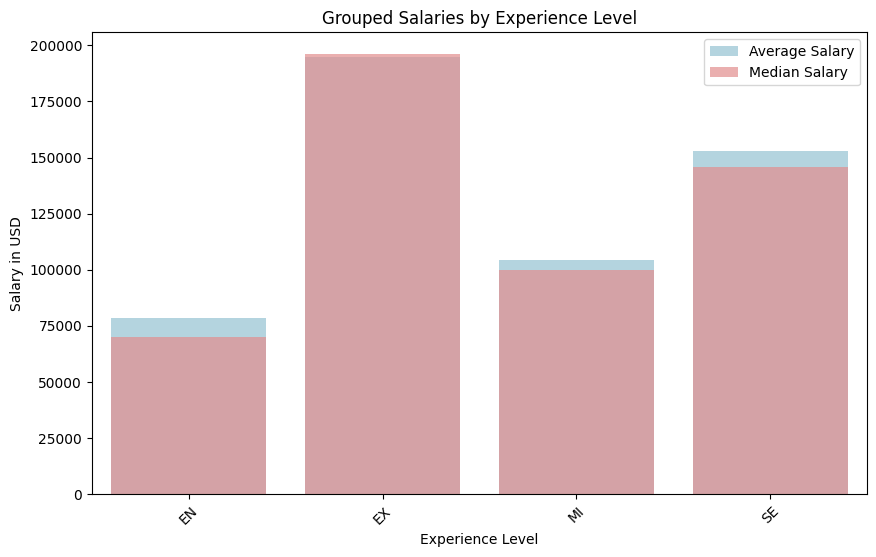

In [36]:

grouped_salaries = df.groupby('experience_level')['salary_in_usd'].agg(['mean', 'median', 'count']).reset_index()

grouped_salaries.columns = ['Experience Level', 'Average Salary', 'Median Salary', 'Count']


plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_salaries, x='Experience Level', y='Average Salary', color='lightblue', label='Average Salary')
sns.barplot(data=grouped_salaries, x='Experience Level', y='Median Salary', color='lightcoral', label='Median Salary', alpha=0.7)
plt.title('Grouped Salaries by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.legend()
plt.xticks(rotation=45)
plt.show()


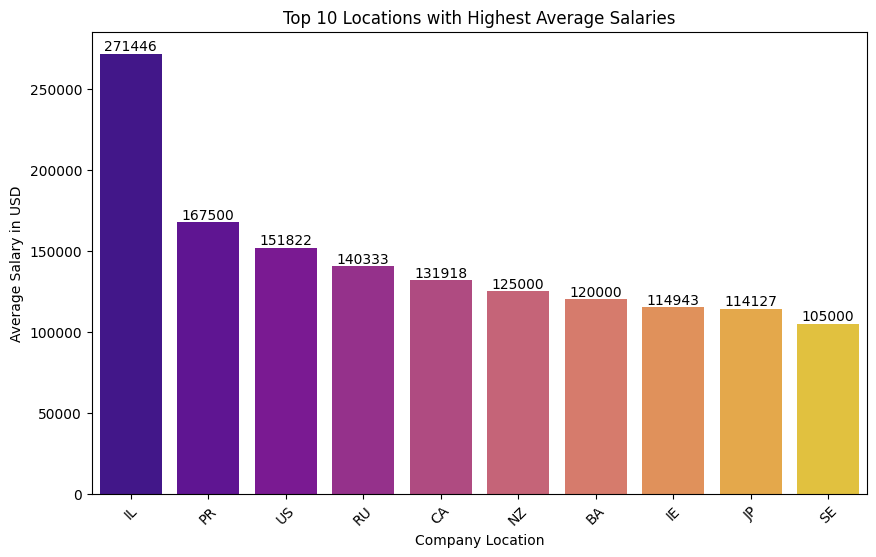

In [48]:



# Step 1: Calculate average salary by company location
average_salary_by_company_location = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Step 2: Sort the values to find the top 10
top_10_company_locations = average_salary_by_company_location.sort_values(by='salary_in_usd', ascending=False).head(10)

# Step 3: Visualization using a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_10_company_locations, x='company_location', y='salary_in_usd',hue='company_location', palette='plasma')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 10 Locations with Highest Average Salaries')
plt.xlabel('Company Location')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45)
plt.show()


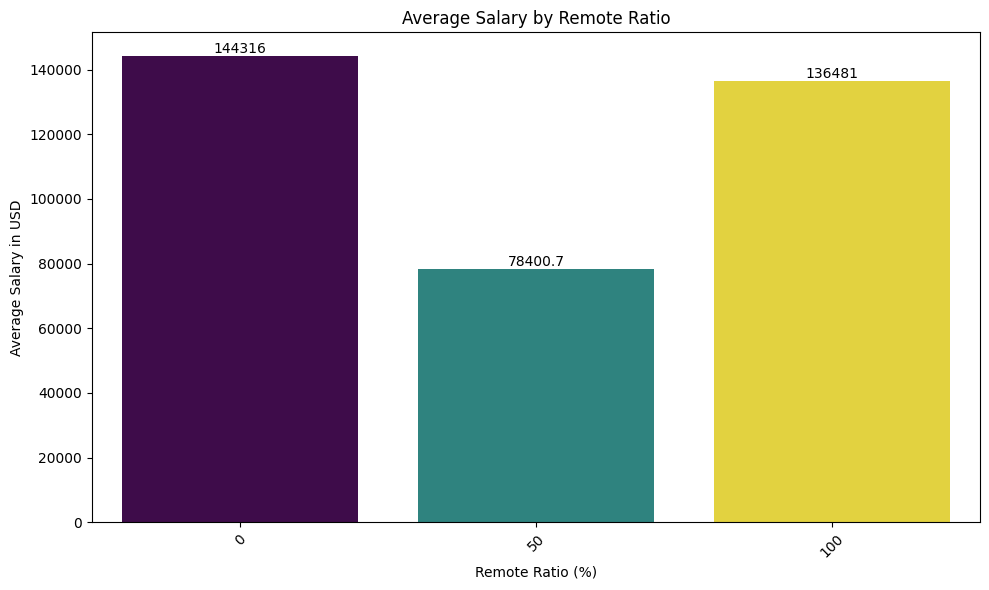

In [59]:



average_salary_by_remote_ratio = df.groupby('remote_ratio')['salary_in_usd'].mean().reset_index()

# Step 2: Sort values for better visualization
average_salary_by_remote_ratio = average_salary_by_remote_ratio.sort_values(by='remote_ratio')

# Step 3: Visualization using a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=average_salary_by_remote_ratio, x='remote_ratio', y='salary_in_usd',hue='remote_ratio', palette='viridis',legend=False)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Average Salary by Remote Ratio')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11140\4130896690.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=job_remote_comparison.reset_index(), x='Remote_Percentage', y='job_title', palette='viridis')


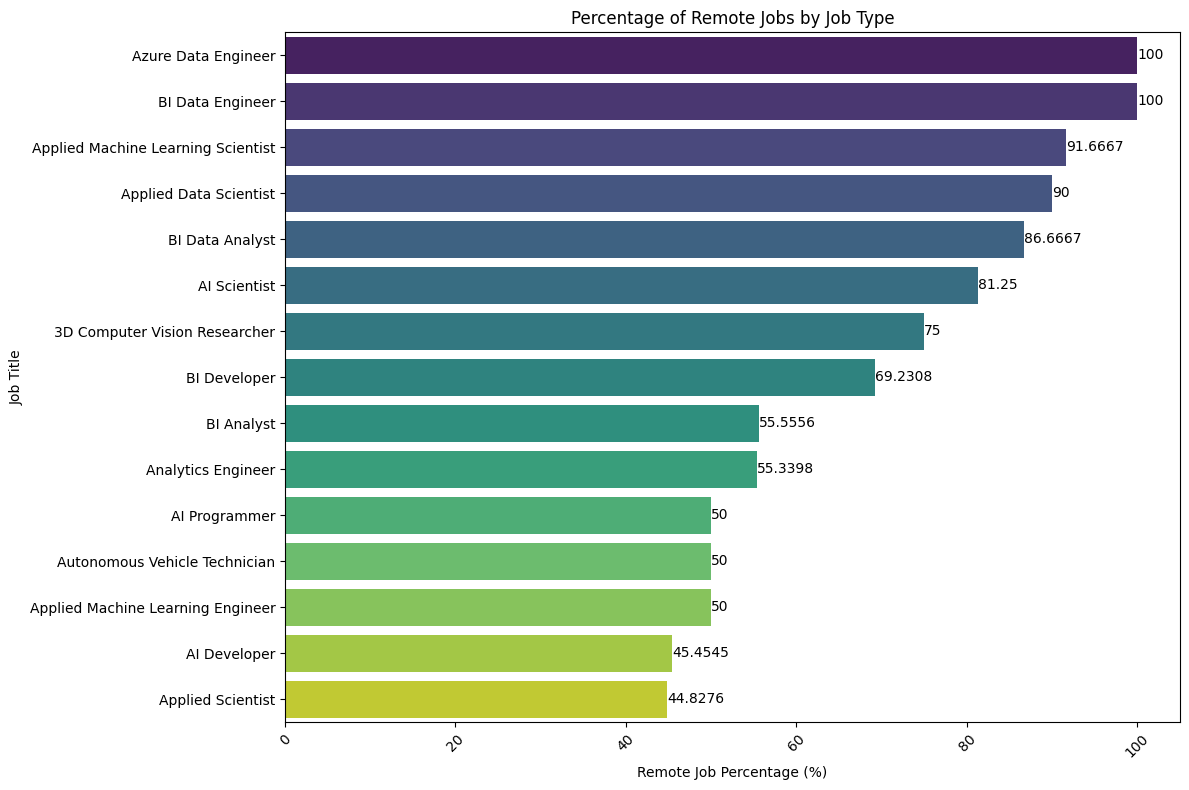

In [63]:


# Step 1: Create a new column to classify jobs as remote or non-remote
df['is_remote'] = df['remote_ratio'].apply(lambda x: 'Remote' if x > 0 else 'Non-Remote')

# Step 2: Calculate the count of remote and non-remote jobs for each job type
job_remote_comparison = df.groupby(['job_title', 'is_remote']).size().unstack(fill_value=0).head(15)

# Step 3: Calculate the percentage of remote jobs for each job title
job_remote_comparison['Remote_Percentage'] = (job_remote_comparison['Remote'] / job_remote_comparison.sum(axis=1)) * 100

# Step 4: Sort values for better visualization
job_remote_comparison = job_remote_comparison.sort_values(by='Remote_Percentage', ascending=False)

# Step 5: Visualization using a bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=job_remote_comparison.reset_index(), x='Remote_Percentage', y='job_title', palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Percentage of Remote Jobs by Job Type')
plt.xlabel('Remote Job Percentage (%)')
plt.ylabel('Job Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


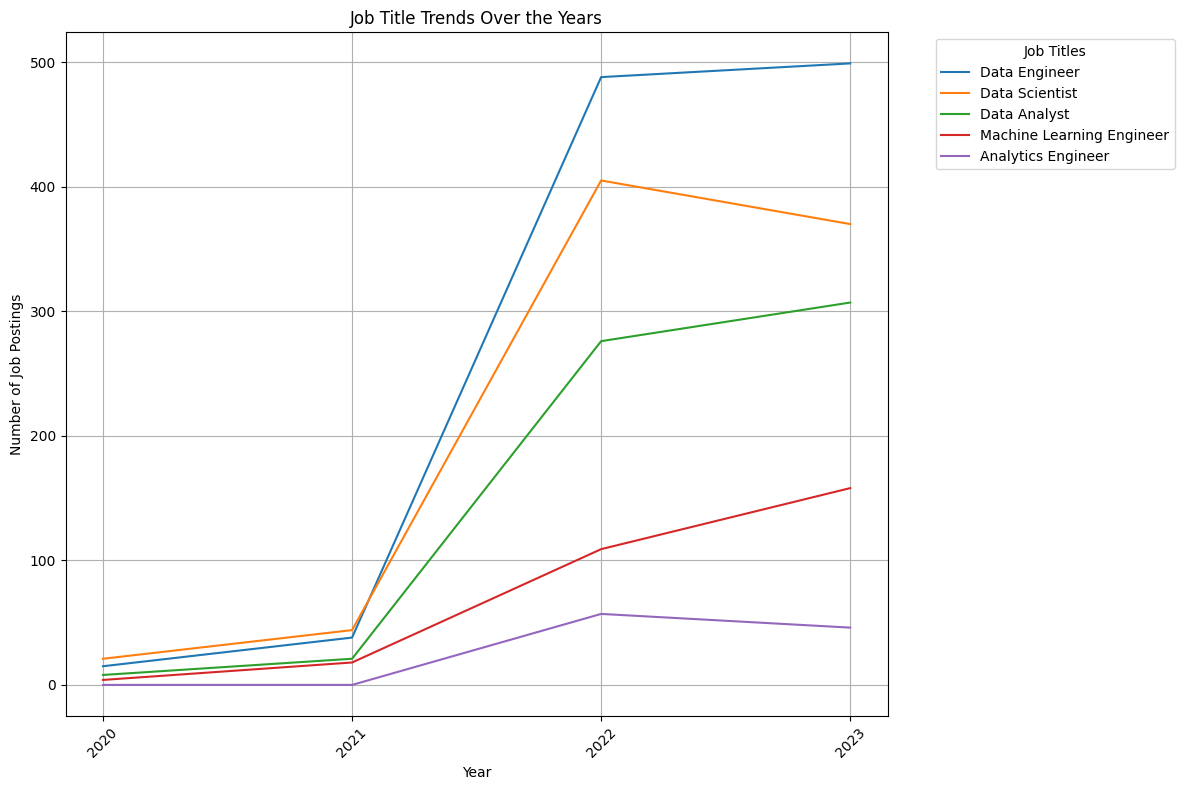

In [67]:


# Step 1: Count occurrences of each job title by year
job_trends = df.groupby(['work_year', 'job_title']).size().reset_index(name='count')

# Step 2: Pivot the DataFrame for better visualization
job_trends_pivot = job_trends.pivot(index='work_year', columns='job_title', values='count').fillna(0)

# Step 3: Select the top job titles (for visualization)
top_job_titles = job_trends.groupby('job_title')['count'].sum().nlargest(5).index  # Change the number to your preference
job_trends_top = job_trends_pivot[top_job_titles]

# Step 4: Visualization using a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=job_trends_top, dashes=False)
plt.title('Job Title Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Job Postings')

# Set x-ticks to show integer years
plt.xticks(ticks=job_trends_top.index, labels=job_trends_top.index, rotation=45)

plt.legend(title='Job Titles', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()



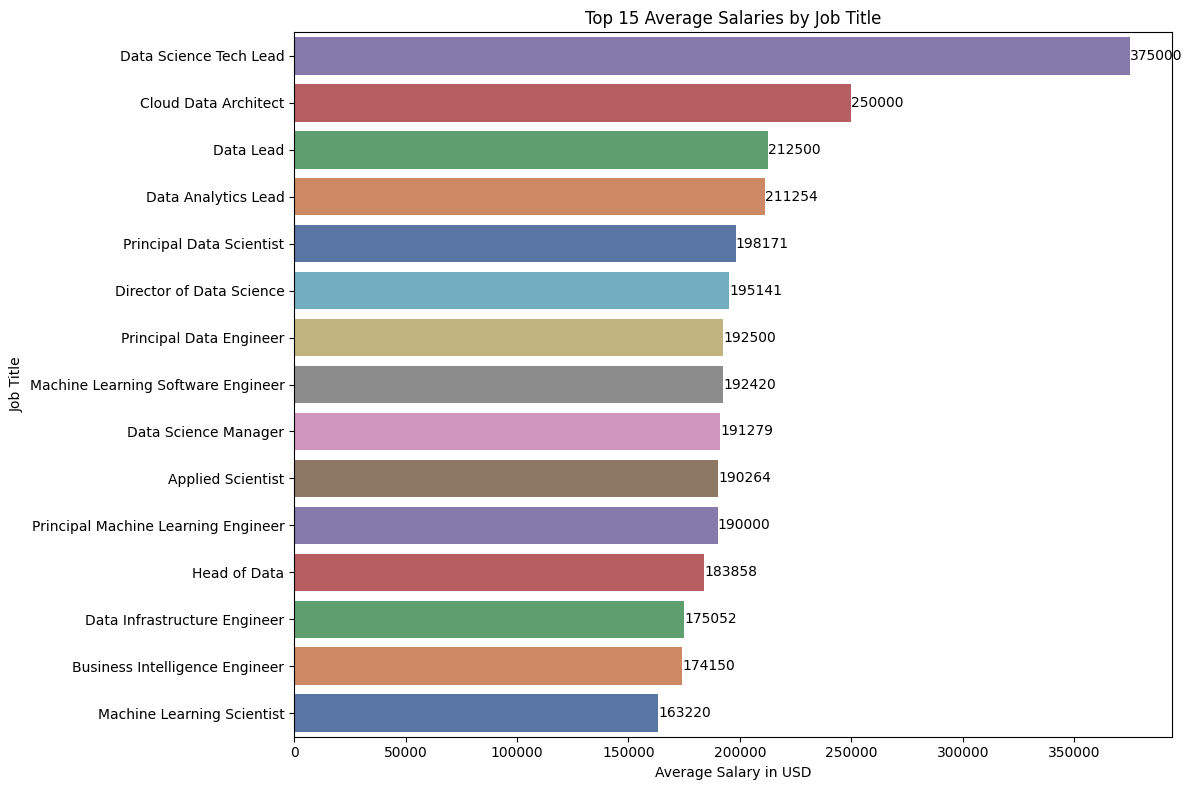

In [72]:

# Step 1: Calculate average salary by job title
average_salary_by_job = df.groupby('job_title')['salary_in_usd'].mean().reset_index()

# Step 2: Sort values and select top 15 job titles
top_15_average_salary = average_salary_by_job.sort_values(by='salary_in_usd', ascending=False).head(15)

# Step 3: Visualization using a bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top_15_average_salary, x='salary_in_usd', y='job_title',hue='salary_in_usd', palette='deep',legend=False)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 15 Average Salaries by Job Title')
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()
